The information of 249 mice and the relationship with tumors and drug regimens was anaylsed in Pymaceuticals. The first observation concerned the sex of the mice. The distribution was nearly even, with 51% male versus 49% female. Mice on the drug regimen of Ramicane had the lowest mean, median, varience, and standard deviation of tumor volume. Followed closely by Capomulin. The correlation and regression run on tumor volume and mouse weight had a strong positive relationship, with a correlation of 0.84 between factors. The heavier the mouse, the larger tumor volume. 

In [1]:
import matplotlib.pyplot as plt
from numpy import outer
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

data_results = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

data_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_number = len(data_results["Mouse ID"].unique())
mouse_number

249

In [3]:
duplicates = data_results.loc[data_results.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
duplicate_mouse = data_results.loc[data_results['Mouse ID'] == 'g989', :]
duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# clean_data_results = data_results.drop_duplicates(subset = ["Mouse ID","Timepoint"])
clean_data_results = data_results[data_results['Mouse ID'].isin(duplicates)==False]
clean_data_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
mouse_number2 = len(clean_data_results["Mouse ID"].unique())
mouse_number2

248

In [7]:
drug_regimen_grouped = clean_data_results.groupby(["Drug Regimen"])


In [8]:
tumor_mean = drug_regimen_grouped['Tumor Volume (mm3)'].mean()

In [9]:
tumor_median = drug_regimen_grouped['Tumor Volume (mm3)'].median()

In [10]:
tumor_varience = drug_regimen_grouped['Tumor Volume (mm3)'].var()

In [11]:
tumor_stddev = drug_regimen_grouped['Tumor Volume (mm3)'].std()

In [12]:
tumor_stderr = drug_regimen_grouped['Tumor Volume (mm3)'].sem()

In [13]:
drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                                    "Median Tumor Volume":tumor_median,
                                    "Tumor Volume Varience":tumor_varience,
                                    "Tumor Volume Std. Dev.":tumor_stddev,
                                    "Tumor Volume Std. Err.":tumor_stderr})
drug_regimen_summary

,Mean Tumor Volue,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
agg_drug_regimen_summary = clean_data_results.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_drug_regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

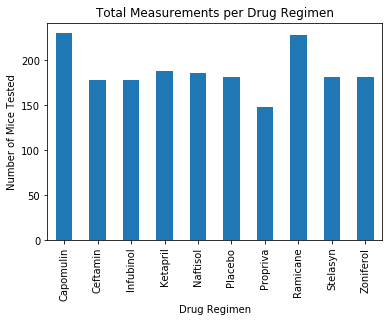

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
mice_tested = drug_regimen_grouped['Timepoint'].count()
drug_pdplot = mice_tested.plot(kind='bar', title='Total Measurements per Drug Regimen')
drug_pdplot.set_xlabel('Drug Regimen')
drug_pdplot.set_ylabel('Number of Mice Tested')

plt.show()

<BarContainer object of 10 artists>

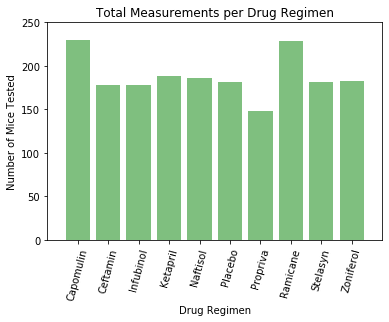

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
x_axis = np.arange(len(mice_tested))
y_axis = mice_tested

tick_loc = [value for value in x_axis]
x_ticks = list(mice_tested.index.values)
plt.xticks(tick_loc, x_ticks, rotation='75')

plt.xlim(-1, len(x_axis))
plt.ylim(0, 250)

plt.title("Total Measurements per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.bar(x_axis, y_axis, color='g', alpha=0.5, align='center')


(-1.1246884618124446,
 1.1096095386331248,
 -1.1106452685719739,
 1.1287928284846025)

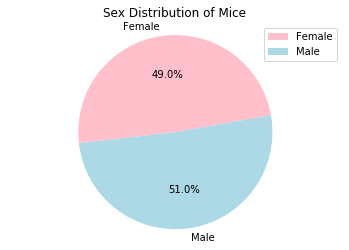

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_data_results.groupby(['Sex']).count()

gender_pie = gender_df.plot(kind='pie', y='Mouse ID', title="Sex Distribution of Mice",
                           autopct = "%.1f%%", startangle=10, colors=['pink','lightblue'])
gender_pie.set_ylabel('')

plt.axis('equal')

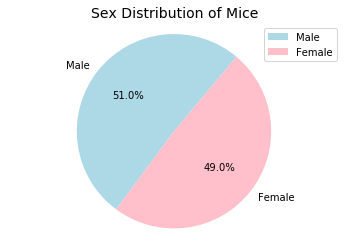

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mouse = clean_data_results['Sex'].value_counts()

colors = ['lightblue','pink']
explode = (0,0)
labels = list(gender_mouse.index)

plt.pie(gender_mouse, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=50)
plt.title("Sex Distribution of Mice", fontsize='14')
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.show()

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data_results.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(greatest_timepoint, clean_data_results, on=(['Mouse ID','Timepoint']))
tumor_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    regimen = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == drug]
    tumor_vol = regimen['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)
    
# Determine outliers using upper and lower bounds
quartile1 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq1 = quartile1[.25]
upperq1 = quartile1[.75]
iqr1 = upperq1-lowerq1

quartile2 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq2 = quartile2[.25]
upperq2 = quartile2[.75]
iqr2 = upperq2-lowerq2

quartile3 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq3 = quartile3[.25]
upperq3 = quartile3[.75]
iqr3 = upperq3-lowerq3

quartile4 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq4 = quartile4[.25]
upperq4 = quartile4[.75]
iqr4 = upperq4-lowerq4

lowerbound1 = lowerq1 - (1.5 * iqr1)
upperbound1 = upperq1 + (1.5 * iqr1)
print(f"{drugs[0]}'s potential outliers: {round(lowerbound1)} and {round(upperbound1)}")

lowerbound2 = lowerq2 - (1.5 * iqr2)
upperbound2 = upperq2 + (1.5 * iqr2)
print(f"{drugs[1]}'s potential outliers: {round(lowerbound2)} and {round(upperbound2)}")

lowerbound3 = lowerq3 - (1.5 * iqr3)
upperbound3 = upperq3 + (1.5 * iqr3)
print(f"{drugs[2]}'s potential outliers: {round(lowerbound3)} and {round(upperbound3)}")

lowerbound4 = lowerq4 - (1.5 * iqr4)
upperbound4 = upperq4 + (1.5 * iqr4)
print(f"{drugs[3]}'s potential outliers: {round(lowerbound4)} and {round(upperbound4)}")

Capomulin's potential outliers: 21.0 and 52.0
Ramicane's potential outliers: 18.0 and 54.0
Infubinol's potential outliers: 37.0 and 83.0
Ceftamin's potential outliers: 25.0 and 88.0


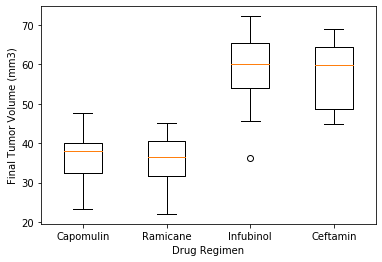

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, labels=drugs)
plt.show()

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mice = clean_data_results.loc[clean_data_results["Drug Regimen"] == "Capomulin"]
capo_mice["Mouse ID"].value_counts()

s710    10
l897    10
g288    10
y793    10
t565    10
u364    10
x401    10
i738    10
b128    10
v923    10
s185    10
m601    10
i557    10
j119    10
b742    10
w914    10
g316    10
r554    10
r944    10
m957    10
l509    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

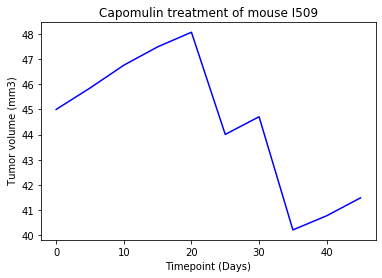

In [23]:
mouse_l509 = clean_data_results.loc[clean_data_results["Mouse ID"] == "l509"]

tumor = mouse_l509["Tumor Volume (mm3)"]
time = mouse_l509["Timepoint"]

plt.plot(time, tumor, color="blue")
plt.title( "Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (Days)")
plt.ylabel(" Tumor volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor volume (mm3)')

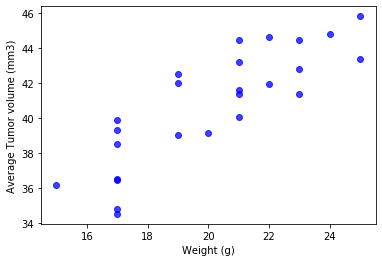

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_regimen =capo_mice.groupby(["Mouse ID"]).mean()
avg_tumor_vol = capo_regimen["Weight (g)"]
avg_weight = capo_regimen["Tumor Volume (mm3)"]

plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="blue",
             alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")

The correlation between mouse weight and the average tumor volume is 0.84


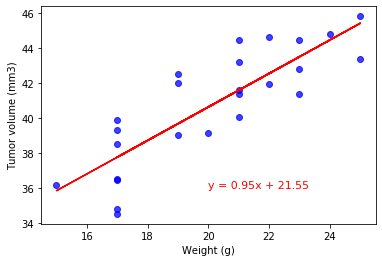

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="blue",
             alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"r-")

plt.annotate(line_eq,(20,36),fontsize=11,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")